In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Implement an MLP by varying bias, weights, and learning rate, and record observations for different learning rate values. Plot a graph showing the relationship between loss (error) and learning rate.

Learning Rate: 0.01, Final Loss: 0.288245
Learning Rate: 0.05, Final Loss: 0.277436
Learning Rate: 0.1, Final Loss: 0.267220
Learning Rate: 0.5, Final Loss: 0.250017
Learning Rate: 1, Final Loss: 0.249870
Learning Rate: 1.5, Final Loss: 0.249836
Learning Rate: 2, Final Loss: 0.249801
Learning Rate: 4, Final Loss: 0.276041
Learning Rate: 9, Final Loss: 0.249546
Learning Rate: 10, Final Loss: 0.293111
Learning Rate: 20, Final Loss: 0.497949
Learning Rate: 30, Final Loss: 0.499983
Learning Rate: 100, Final Loss: 0.500000
Learning Rate: 10000, Final Loss: 0.500000
Learning Rate: 20000, Final Loss: 0.500000


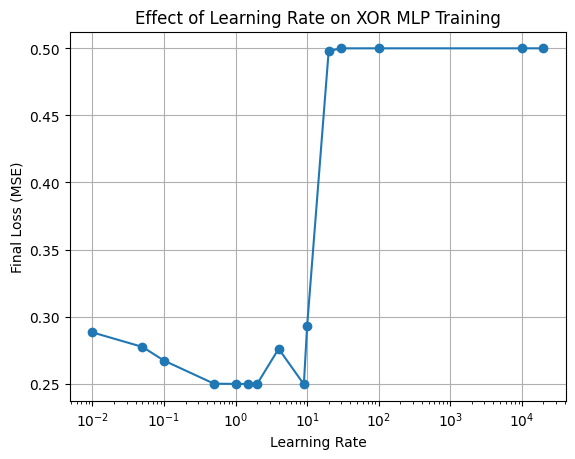

In [18]:
import numpy as np
import matplotlib.pyplot as plt 


def sigmoid(x):
    return 1/ (1+(np.exp(-x)))

def sigmoid_derivative(x):
    return x*(1-x)

def mse(y_true,y_pred):
    return np.mean((y_true-y_pred)**2)

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([[0], [1], [1], [0]])

learning_rates = [0.01, 0.05, 0.1, 0.5, 1,1.5,2,4,9,10,20,30,100,10000,20000]
losses_rate=[]

epochs=10

for lr in learning_rates:


    w1=np.random.randn(2,2)
    w2=np.random.randn(2,1)
    b1=np.random.randn(1,2)
    b2=np.random.randn(1,1)

    for epoch in range(epochs):
        
        np.random.seed(42)
        hidden_inp=np.dot(X,w1)+b1
        hidden_out=sigmoid(hidden_inp)

        final_output_inp=np.dot(hidden_out,w2)+b2
        y_pred=sigmoid(final_output_inp)

   
        error=y-y_pred
        loss=(np.mean(error**2))

        d_output=error*sigmoid_derivative(y_pred)
    
        d_hidden = d_output.dot(w2.T) * sigmoid_derivative(hidden_out)

 
        w2 += hidden_out.T.dot(d_output) * lr
        b2 += np.sum(d_output, axis=0, keepdims=True) * lr
        w1 += X.T.dot(d_hidden) * lr
        b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr

    losses_rate.append(loss)
    print(f"Learning Rate: {lr}, Final Loss: {loss:.6f}")


plt.figure()
plt.plot(learning_rates, losses_rate, marker='o') # Fixed variable name
plt.xlabel("Learning Rate")
plt.ylabel("Final Loss (MSE)")
plt.title("Effect of Learning Rate on XOR MLP Training")
plt.xscale("log")
plt.grid(True)
plt.show()

In [107]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=125)
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)                  #random_state=170 and test_size=0.3, acc=0.9333
print("Accuracy:", accuracy)                               #random_state=100 and test_size=0.2  acc=1.000
                                                           #random_state=100 and test_size=0.25 acc=1.000
                                                           #random_state=125 and test_size=0.4 acc=0.90
                        

Accuracy: 0.9
